In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [3]:
df= pd.read_csv('Wholesale Customer.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [14]:
df["Total"] = (df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicatessen"])
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [16]:
df1=df.groupby(by='Channel')['Total'].sum()
df2=df.groupby(by='Region')['Total'].sum()

In [35]:
df1

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

In [22]:
df2

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [32]:
df.describe(include='all')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [38]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os

<ipython-input-39-8708b8fca7f3>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.dtypes[column] == np.object:
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-39-8708b8fca7f3>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidan

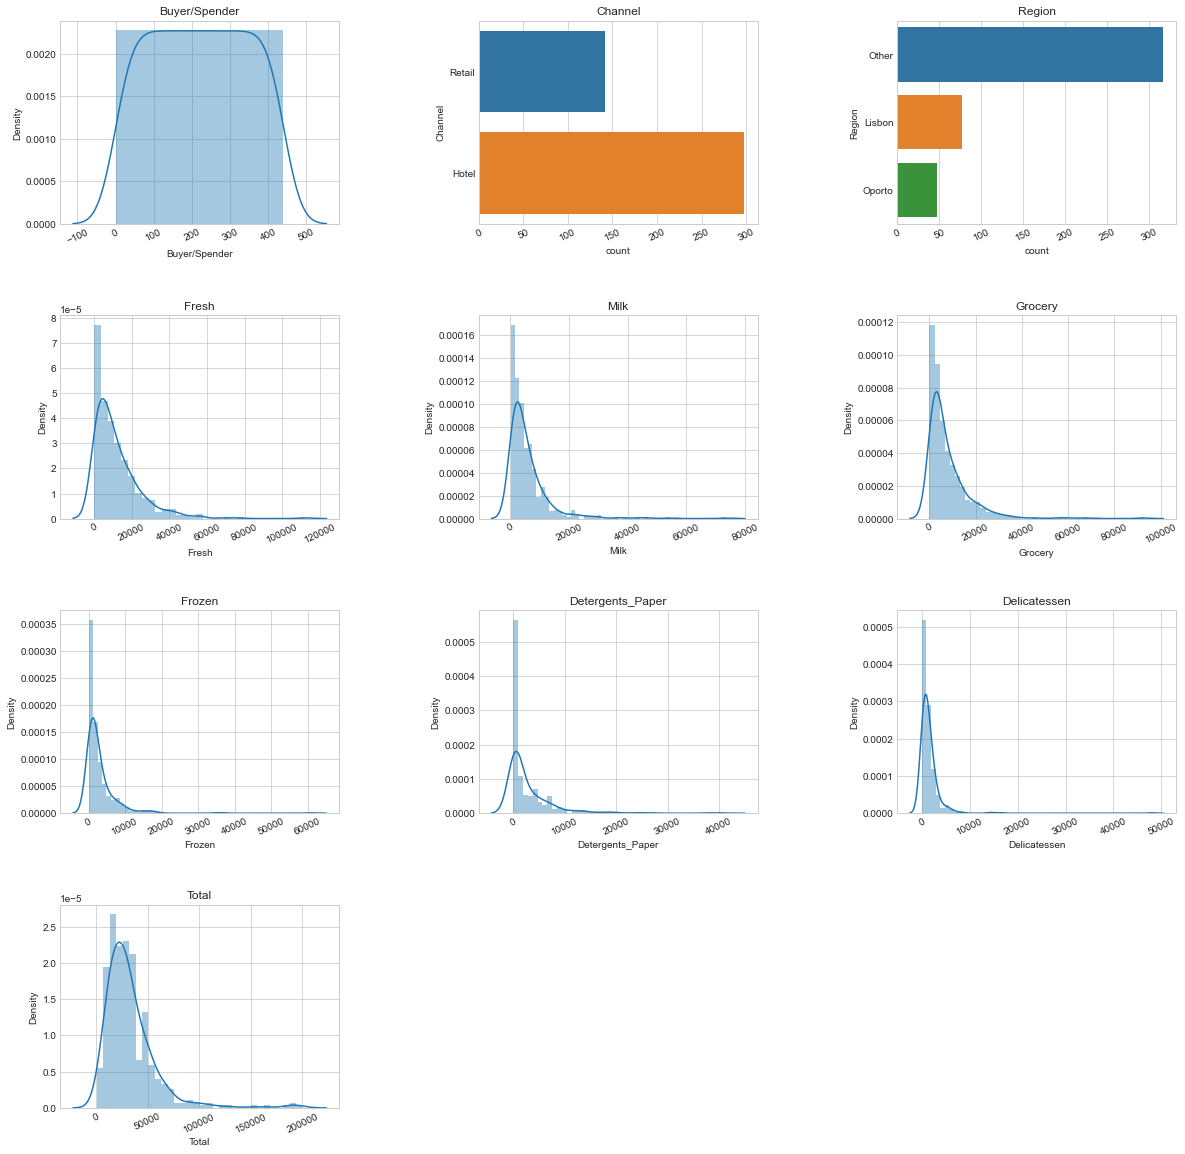

In [39]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

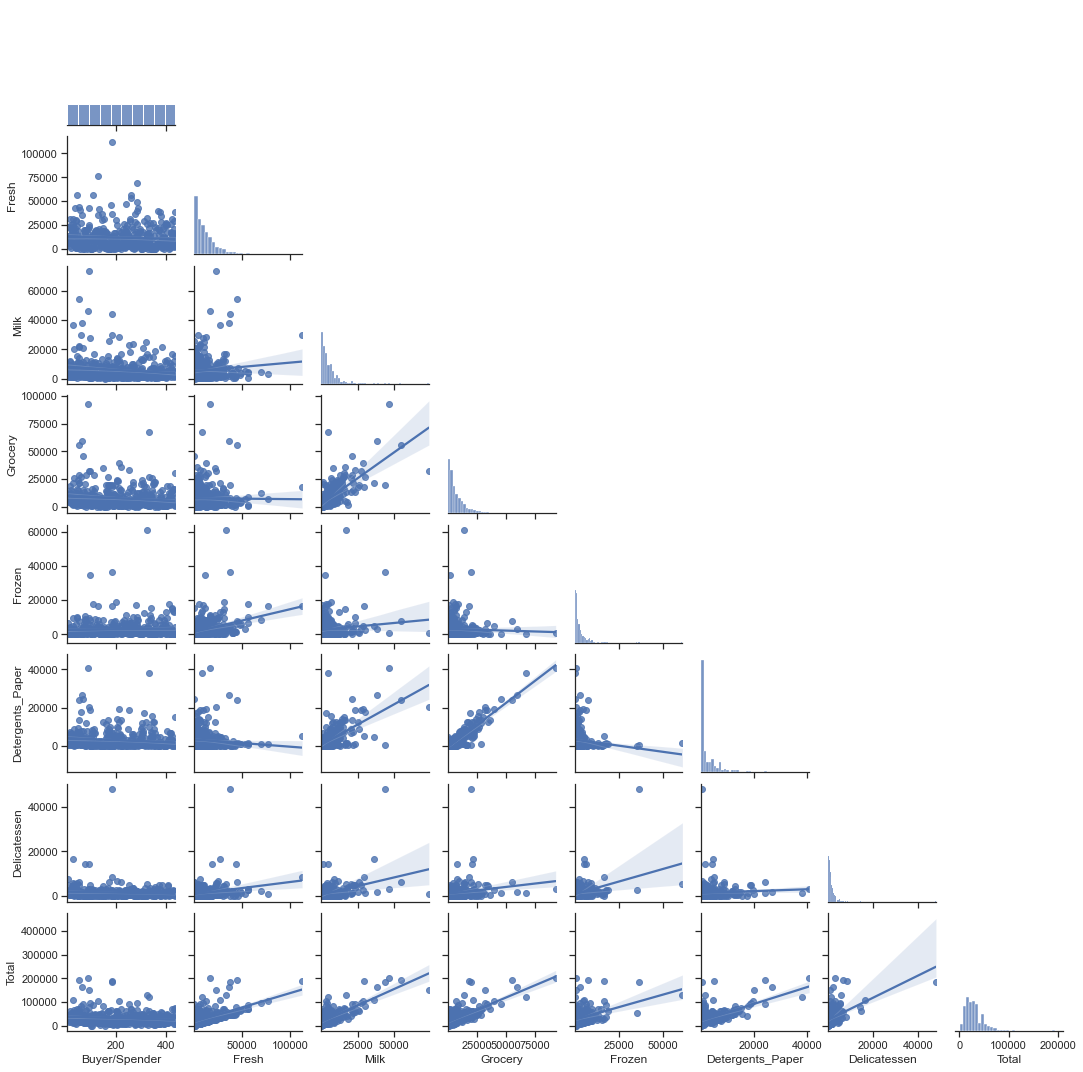

In [40]:
sns.set(style="ticks")
g = sns.pairplot(df,corner=True,kind='reg')
g.fig.set_size_inches(15,15)

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [41]:
df.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

*Fresh item has highest Standard Deviation So that is Inconsistent.


*Delicatessen item have smallest Standard deviation, so that is consistent.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<function matplotlib.pyplot.show(close=None, block=None)>

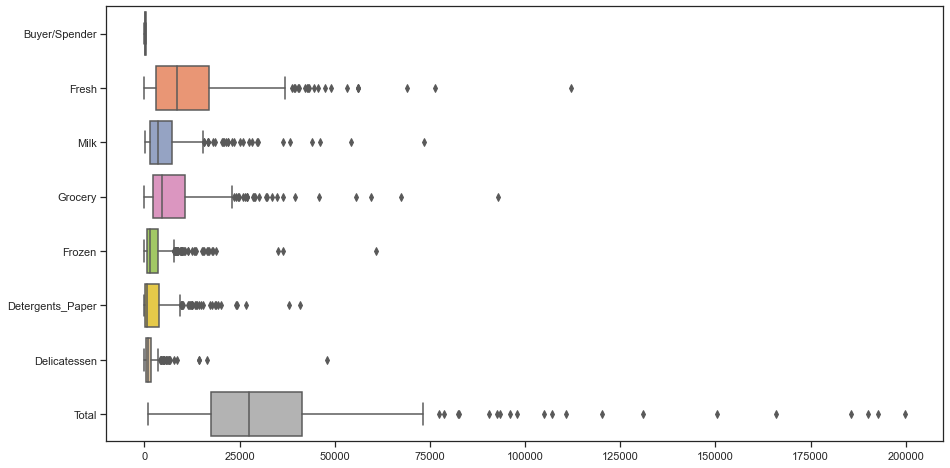

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,orient="h", palette="Set2")
plt.show

*Yes there are outliers in all the items across the product range (Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen)

*Outliers are detected but not necessarily removed, it depends on the situation. Here I will assume that the wholesale distributor provided us a dataset with correct data, so I will keep them as it is.

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

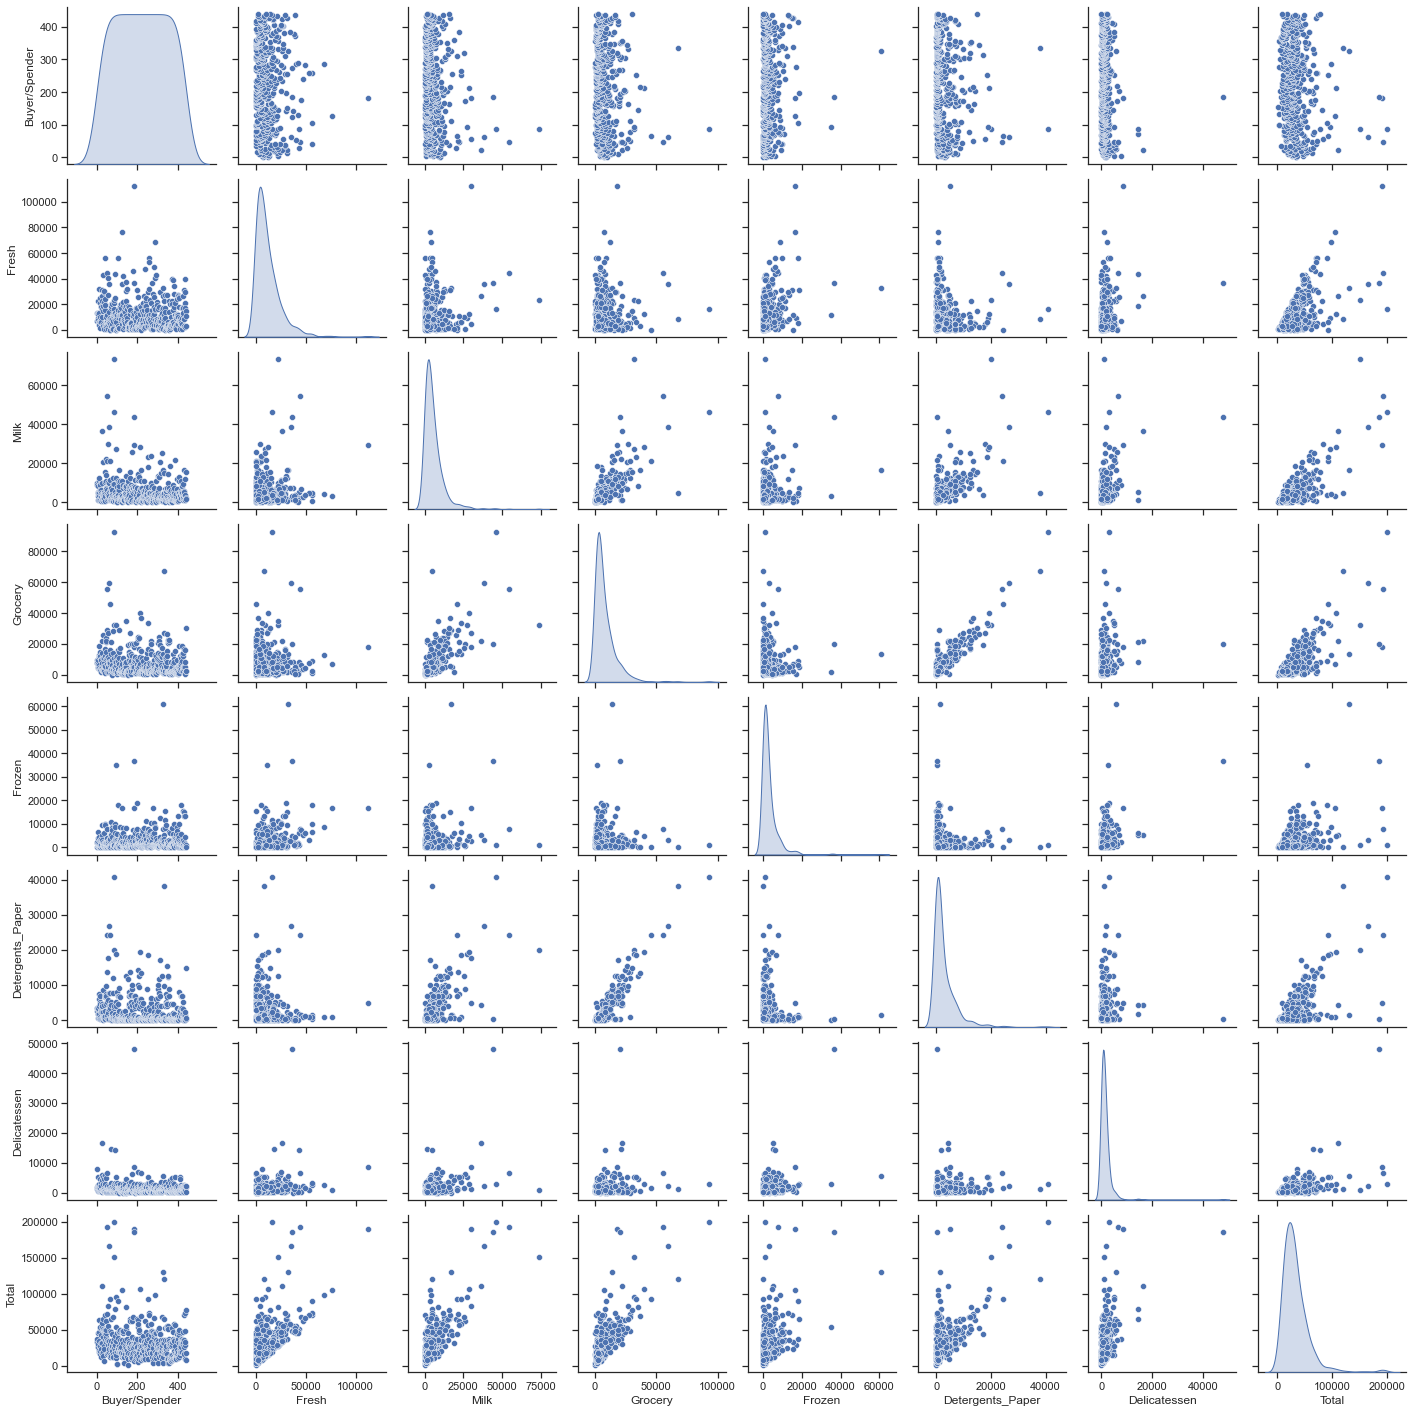

In [43]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [45]:
corr=df.corr()
corr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845,-0.150745
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Total,-0.150745,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


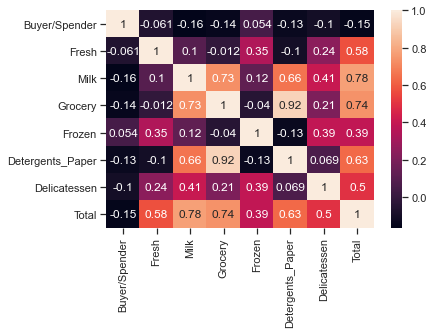

In [46]:
sns.heatmap(corr,annot = True)
plt.show()

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [48]:
df1 = pd.read_csv('Survey-1.csv')
df1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


## 2.1.1. Gender and Major

In [49]:
pd.crosstab(index=df1['Gender'], columns=df1['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


## 2.1.2. Gender and Grad Intention

In [51]:
pd.crosstab(index=df1['Gender'], columns=df1['Grad Intention'], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


## 2.1.3. Gender and Employment

In [52]:
pd.crosstab(index=df1['Gender'], columns=df1['Employment'], margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


## 2.1.4. Gender and Computer

In [80]:
pd.crosstab(index=df1['Gender'], columns=df1['Computer'], margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

## The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

### For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

### 𝐻0 ≤ 0.35
### 𝐻1  > 0.35


### For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:
### 𝐻0 ≤ 0.35
### 𝐻1  > 0.35

In [4]:
df2 = pd.read_csv('A+&+B+shingles.csv')
df2

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [5]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import ttest_1samp

### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [6]:
t_statistic, p_value = ttest_1samp(df2, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: [-1.47350463         nan] p value: [0.07477633        nan] 


#### In this, p value is 0.07477633 and it is greater than 5% level of significance.

#### So the statistical is failling to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is sufficient evidence to prove that mean moisture content is less than 0.35 pound per 100 square feet.

In [7]:
t_statistic, p_value = ttest_1samp(df2, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: [-1.4735046253382782 -3.1003313069986995] p value: [0.07477633144907499 0.0020904774003191826] 


### Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0021. 

### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### H0 : μ(A)= μ(B)  

####  Ha : μ(A)!= μ(B)  

####  α = 0.05  

In [8]:
from scipy import stats
from scipy.stats import ttest_ind

In [9]:
t_statistic,p_value=ttest_ind(df2['A'],df2['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3))) 

t_statistic=1.29 and pvalue=0.202


### As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal Test Assumptions When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same.